In [2]:
import matplotlib.pyplot as plot
%matplotlib inline
import gym
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines.common.vec_env import SubprocVecEnv
from stable_baselines import ACER

action_errors = [0, 0.0001, 0.001, 0.01, 0.1]
training_steps = 200000
evalfreq = 10000
rewards = []

for std in action_errors:
    std_rewards = []
    for i in range(4):
        print(std, "=std")

        # with error
        # multiprocess environment
        n_cpu = 4
        env = SubprocVecEnv([lambda: gym.make('MountainCar-v0') for i in range(n_cpu)])

        model = ACER(MlpPolicy, env, verbose=0, action_error_std=std, actiondim=3, evalfreq=evalfreq)
        model.learn(total_timesteps=training_steps)
        model.save("acer_mountain")

        std_rewards.append(model.greedy_rewards)

        del model # remove to demonstrate saving and loading
    rewards.append(std_rewards)

ModuleNotFoundError: No module named 'gym.spaces'

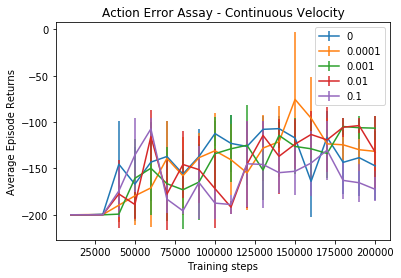

In [ ]:
import numpy as np
means = np.mean(np.array(rewards), axis=1)
stds = np.std(np.array(rewards), axis=1)

for i in range(len(means)):
    std = action_errors[i]
    plot.errorbar(np.arange(evalfreq,training_steps+evalfreq, evalfreq), means[i], yerr=stds[i], label=str(std))

plot.title('Action Error Assay - Continuous Velocity')
plot.legend()
plot.xlabel('Training steps')
plot.ylabel('Average Episode Returns')
plot.show()


In [ ]:
training_steps = 200000
evalfreq = 10000
len(np.arange(0,training_steps, evalfreq))

In [ ]:
len(stds[i])

In [ ]:
a = []
for i in range(5):
    b = []
    for j in range(3):
        b.append(np.array([1,2,3])*j)
    a.append(b)
        
np.array(a)

In [ ]:
str(200)

In [ ]:
import gym

from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines.common.vec_env import SubprocVecEnv
from stable_baselines import ACER

# multiprocess environment
n_cpu = 4
env = SubprocVecEnv([lambda: gym.make('MountainCar-v0') for i in range(n_cpu)])

model = ACER(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=200000)
model.save("acer_mountain")

del model # remove to demonstrate saving and loading

In [ ]:
model = ACER.load("acer_mountain")
env = gym.make("MountainCar-v0")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [ ]:
model = ACER.load("acer_mountain")
env = gym.make("MountainCar-v0")
while True:
    obs, done = env.reset(), False
    episode_rew = 0
    while not done:
        env.render()
        action, _states = model.predict(obs, deterministic=True)
        obs, rew, done, info = env.step(action)
        episode_rew += rew
    print("Episode reward", episode_rew)

In [1]:
a = 1